## ANÁLISIS MULTIVARIABLE DE DATOS

El análisis multivariable de datos (AMD) es una técnica estadística utilizada para analizar y comprender conjuntos de datos que contienen multiples variables. El análisis multivariado permite explorar as relaciones entre varias simultáneamente.

El objeto principal del análisis multivariado es identificar patrones, tendencias y estructuraas ocultas dentro de los datos.

Métodos de análisis multivariado:
- Análisis de Componentes Principales (PCA)
- Análisis de factores
- Análisis de Clúster (Cluster Analysis)
- Análisis Discriminante ( Discriminant Analyst)
- Análisis de Regresión Multivariada


#### ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)

Técnica que transforma las variables originales en un nuevo conjunto de variables **no correlacionadas** llamadas componentes principales. Estas componentes se ordenan por importancia y permiten reducir la dimensionalidad de los datos, facilitando su visualización y comprensión.

Los componentes se ordenan por la cantidad de varianza original que diescriben, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.

La implementación de esta técnica permite identificar y eliminar las variables irrelevantes.

_¿Por qué hacer reducción dimensional?_

¡Existe una alta probabilidad de tener entradas redundantes debido al desconocimiento del problema!

- Porque es de interés identificar y eliminar las variables irrelevantes.
- Porque no siempre el mejor modelo es el que más variables tiene en cuenta.
- Porque se mejora el rendimiento computacional, lo que se traduce en n ahorro en costo y tiempo.
- Porque se reduce la complejidad, lo que lleva a facilitar la comprensión del modelo y sus resultados.
- Disminución de costos monetarios.

##### Valores y Vectores Propios

In [1]:
import numpy as np

In [23]:
A = np.array([[3,2], [1,0]])
A

array([[3, 2],
       [1, 0]])

In [24]:
# linalg -> Módulo de álgebra lineal en numpy
# eig -> Valores y vectores propios de una matriz
λ, v = np.linalg.eig(A)

In [25]:
print(λ)

[ 3.56155281 -0.56155281]


In [26]:
print(v)

[[ 0.96276969 -0.48963374]
 [ 0.27032301  0.87192821]]


Los vectores propios son las columnas de la matriz

In [27]:
v = v.T # .T transpone la matriz
v

array([[ 0.96276969,  0.27032301],
       [-0.48963374,  0.87192821]])

Los valores propios son $\lambda = {3.56, -0.56}$

Los vectores propios son: $\\  \vec{v_1} = \begin {pmatrix} 0.96 \\ 0.27 \end{pmatrix} \\ \vec{v_2} = \begin {pmatrix} -0.49 \\ 0.87 \end{pmatrix}  $ 

In [28]:
A

array([[3, 2],
       [1, 0]])

In [29]:
v[0]

array([0.96276969, 0.27032301])

$$ A\vec{v} = \lambda \vec{v}  $$
$$ A\vec{v} - \lambda \vec{v}  = 0 $$

Con el primer vector propio

In [30]:
np.dot(A, v[0])

array([3.42895508, 0.96276969])

In [31]:
λ[0] * v[0]

array([3.42895508, 0.96276969])

In [40]:
np.dot(A, v[0]) - (λ[0] * v[0]) # es un cero en la aproximación computacional

array([ 4.44089210e-16, -1.11022302e-16])

Con el segundo vector propio

In [41]:
np.dot(A, v[1])

array([ 0.2749552 , -0.48963374])

In [42]:
λ[1]*v[1]

array([ 0.2749552 , -0.48963374])

In [43]:
np.dot(A, v[1]) - λ[1]*v[1] # [0, 0] es un cero en la aproximación computacional

array([1.11022302e-16, 5.55111512e-17])

### PCA

In [44]:
import seaborn as sns
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [45]:
# Cargar datos desde sklearn
iris = datasets.load_iris()

In [46]:
type(iris) # Bunch -> estructura de datos con un formato parecido al de los diccionarios

sklearn.utils._bunch.Bunch

In [47]:
print('key: {}'.format(iris.keys()))

key: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [50]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [51]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
iris.filename # Prueba de cada una de las claves(keys)

'iris.csv'

In [56]:
x = iris.data
names = iris.target_names
features = iris.feature_names

In [59]:
x.shape

(150, 4)

In [60]:
type(x)

numpy.ndarray

In [61]:
np.size(x)

600

In [62]:
np.size(x, axis=1)

4

In [63]:
np.size(x, axis=0)

150

In [64]:
d = np.size(x, axis= 1) # d = dimensión del espacio - número de columnas
y = iris.target # Variable numérica de clasificación de las flores

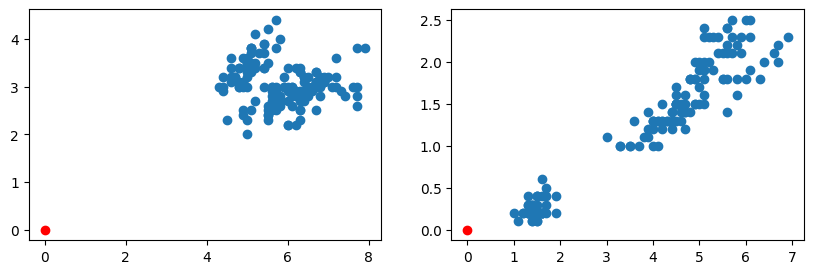

In [68]:
plt.figure(figsize= (10,3))

plt.subplot(1, 2, 1)
plt.scatter(x[:,0], x[:,1])
plt.scatter(0,0, color ='red')

plt.subplot(1, 2, 2)
plt.scatter(x[:,2], x[:,3])
plt.scatter(0,0, color ='red')

plt.show()

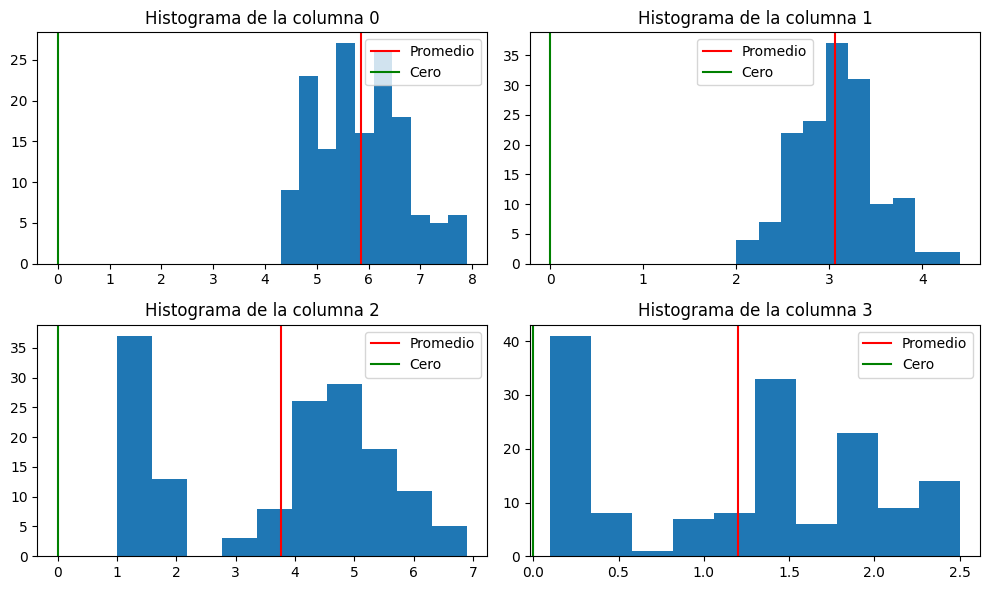

In [79]:
plt.figure(figsize= (10,6))

plt.subplot(2, 2, 1)
plt.title('Histograma de la columna 0')
plt.hist(x[:,0]) 
plt.axvline(x[:,0].mean(), color = 'red', label= 'Promedio')
plt.axvline(0, label= 'Cero', color = 'green')
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Histograma de la columna 1')
plt.hist(x[:,1]) # Todas las filas de la columna 1
plt.axvline(x[:,1].mean(), color = 'red', label= 'Promedio')
plt.axvline(0, label= 'Cero', color = 'green')
plt.legend()

plt.subplot(2, 2, 3)
plt.title('Histograma de la columna 2')
plt.hist(x[:,2])
plt.axvline(x[:,2].mean(), color = 'red', label= 'Promedio')
plt.axvline(0, label= 'Cero', color = 'green')
plt.legend()

plt.subplot(2, 2, 4)
plt.title('Histograma de la columna 3')
plt.hist(x[:,3])
plt.axvline(x[:,3].mean(), color = 'red', label= 'Promedio')
plt.axvline(0, label= 'Cero', color = 'green')
plt.legend()

plt.tight_layout()
plt.show()

Estandarización -> Centrar las variables

Después de la estandarización

In [84]:
x_ = x - np.mean(x, axis = 0) # Estándarización de variables

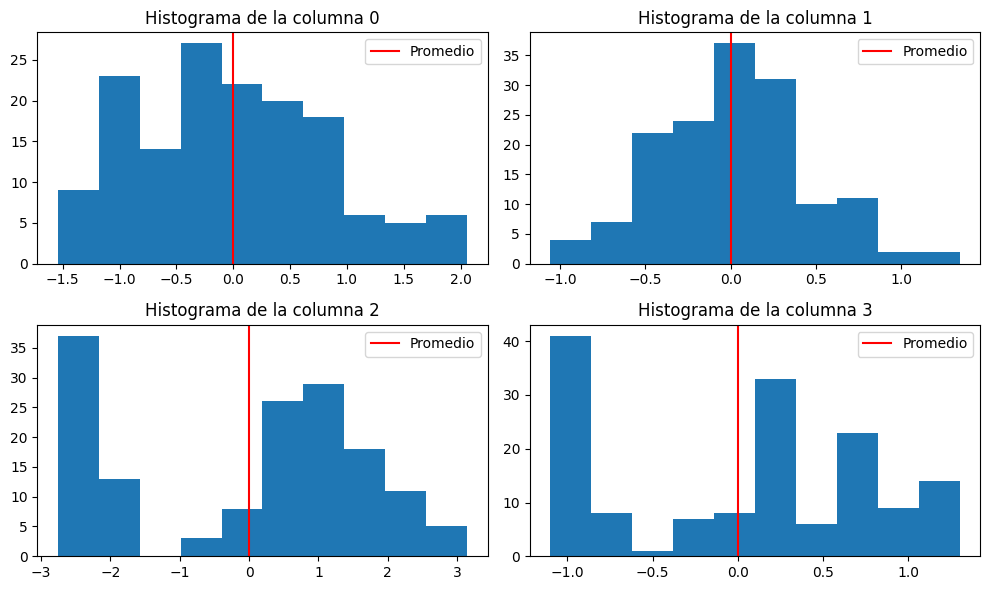

In [85]:
plt.figure(figsize= (10,6))

plt.subplot(2, 2, 1)
plt.title('Histograma de la columna 0')
plt.hist(x_[:,0]) 
plt.axvline(x_[:,0].mean(), color = 'red', label= 'Promedio')
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Histograma de la columna 1')
plt.hist(x_[:,1]) # Todas las filas de la columna 1
plt.axvline(x_[:,1].mean(), color = 'red', label= 'Promedio')
plt.legend()

plt.subplot(2, 2, 3)
plt.title('Histograma de la columna 2')
plt.hist(x_[:,2])
plt.axvline(x_[:,2].mean(), color = 'red', label= 'Promedio')
plt.legend()

plt.subplot(2, 2, 4)
plt.title('Histograma de la columna 3')
plt.hist(x_[:,3])
plt.axvline(x_[:,3].mean(), color = 'red', label= 'Promedio')
plt.legend()

plt.tight_layout()
plt.show()

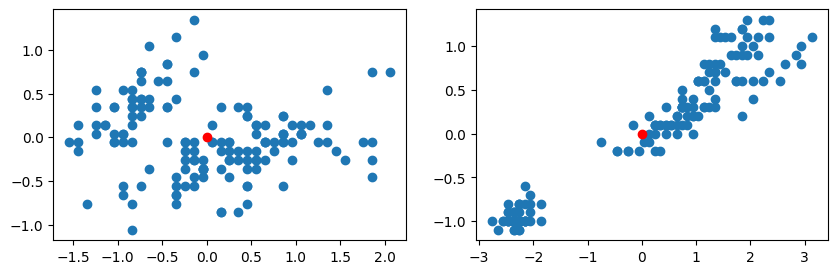

In [87]:
plt.figure(figsize= (10,3))

plt.subplot(1, 2, 1)
plt.scatter(x_[:,0], x_[:,1])
plt.scatter(0,0, color ='red')

plt.subplot(1, 2, 2)
plt.scatter(x_[:,2], x_[:,3])
plt.scatter(0,0, color ='red')

plt.show()

Cálculo de la matriz de covarianza

In [93]:
A = np.transpose(x_) # Transposición de los datos originales
K = np.cov(A) # K -> matriz de covarianza
K 

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

Calculo valores  y vectores propios de la matriz de covarianza

In [94]:
λ, v = np.linalg.eig(K)

In [92]:
print(λ) # Valores propios salen organizados

[4.22824171 0.24267075 0.0782095  0.02383509]


In [95]:
print(v)

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


Si conservo $ m < d$ dimensiones ¿cuál debería ser el valor de $m$?

Primer camino -> Exploración visual

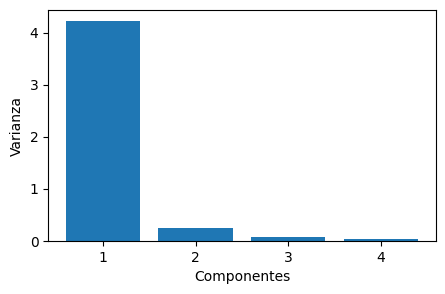

In [100]:
plt.figure(figsize= (5,3))
plt.bar(list(range(d)), λ)
plt.xticks(list(range(4)), list(range(1,5)))
plt.xlabel('Componentes')
plt.ylabel('Varianza')
plt.show()

Segundo camino -> Cálculo de porcentajes

In [101]:
λ / sum(λ) # Normalizar lambda

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [105]:
porcentajes = (λ / sum(λ)) * 100 # El primer valor propio conservaba el 92% de la varianza del sistema

In [107]:
np.cumsum(porcentajes)

array([ 92.46187232,  97.76852063,  99.47878161, 100.        ])

_Las variables que tomo deben capturarme al menos el 95% de la varianza del sistema_

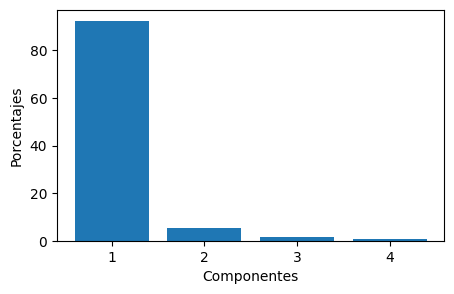

In [106]:
plt.figure(figsize= (5,3))
plt.bar(list(range(d)), porcentajes)
plt.xticks(list(range(4)), list(range(1,5)))
plt.xlabel('Componentes')
plt.ylabel('Porcentajes')
plt.show()

**Si considero las dos primeras variables $ m=2 $ capturo más del $ 95% $ de la varianza!**

#### ANÁLISIS POR CLÚSTERS (CLUSTER ANALYSIS)

Agrupa las observaciones en conjuntps homogéneos, donde los miembros de un grupo son más similares entre si que con los miembros de otros grupos. Es útil para identificar patrones o segmentos dentro de los daots.

Los miembros de un conjunto homogéneo tienen características o comportamientos mñas parecidos entre ellos que con los miembros de otros conjuntos.